In [1]:
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib as mpl

/var/folders/cd/b14jxcv1623c49mdlsjf5gj80000gn/T/ipykernel_35061/2289981336.py:54: RuntimeWarning: invalid value encountered in remainder
  mask = split[1].data[split_type[split_num]] % 2 == j
/var/folders/cd/b14jxcv1623c49mdlsjf5gj80000gn/T/ipykernel_35061/2289981336.py:54: RuntimeWarning: invalid value encountered in remainder
  mask = split[1].data[split_type[split_num]] % 2 == j


(-0.05500000000000001,
 0.05500000000000001,
 -0.05500000000000001,
 0.05500000000000001)

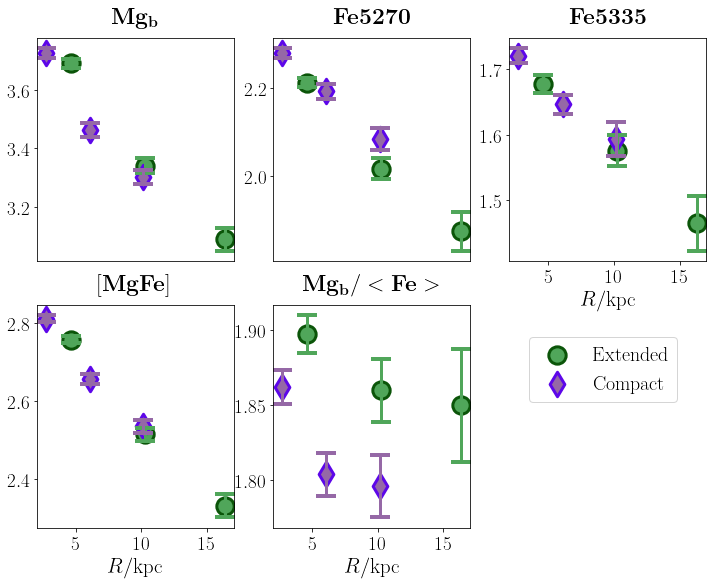

In [ ]:
names_cal = {'Mg_b': r'$\mathbf{Mg_b}$', 'Fe5270': r'$\mathbf{Fe5270}$', 'Fe5335': r'$\mathbf{Fe5335}$',
             'MgFe': r'$\mathbf{[MgFe]}$', 'Mgb/Fe': r'$\mathbf{Mg_b/<Fe>}$'}
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "Charter",
    "xtick.labelsize": 19,
    "ytick.labelsize": 19,
    "axes.labelsize": 21,
    "axes.labelweight": "bold"
})
fig, ax = plt.subplots(2, 3, figsize=(12, 9), clear=True)

split = fits.open('../data/sample_split_outliers_total.fits')
split_type = ['mtot_v_m20kpc', 'm10kpc_v_sigmacen', 'm10kpc_v_m20kpc_control', 'm20kpc_v_sigmacen', 'sigma_v_mtot']
split_num =2
r_median = fits.open('../data/rmax_median_re2.fits')
rnames = ['rin_median(kpc)', 'rmid_median(kpc)', 'rout_median(kpc)']
snr_names = ['snr_in', 'snr_mid', 'snr_out']

pcas = ['no', '1', '2', '3', '4', '5']
pca = 0

idx_path = '../data/index/'
normalize = mcolors.Normalize(vmin=-1.3, vmax=0.3)
colormap = mpl.cm.PRGn
color_low = colormap(normalize(-1))
color_high = colormap(normalize(0))
colors = [color_high, color_low]
edgecolors = ['xkcd:forest', 'xkcd:blue violet']
shapes = ['o', 'd']
labels = [r'$\mathrm{Extended}$', r'$\mathrm{Compact}$']
if (split_num == 3) | (split_num == 1):
    colors = ['xkcd:tangerine', 'xkcd:dark sky blue']
    edgecolors = ['xkcd:pumpkin', 'xkcd:vivid blue']
    shapes = ['p', 's']
    labels = [r'$\mathrm{Higher\ \sigma}$', r'$\mathrm{Lower\ \sigma}$']

labels2 = ['high', 'low']
radii = ['in','mid','out']
bins_r = []
bins_re = []

bins_snr = []
for j in range(2):
    in_err = fits.open(
        idx_path + split_type[split_num] + '/indices_linear_deg_in_etg_' + split_type[split_num] + '_total_' +
        labels2[j] + '.fits')
    mid_err = fits.open(
        idx_path + split_type[split_num] + '/indices_linear_deg_mid_etg_' + split_type[split_num] + '_total_' +
        labels2[j] + '.fits')
    out_err = fits.open(
        idx_path + split_type[split_num] + '/indices_linear_deg_out_etg_' + split_type[split_num] + '_total_' +
        labels2[j] + '.fits')
    mask = split[1].data[split_type[split_num]] % 2 == j
    _, idx, _ = np.intersect1d(r_median[1].data['plateifu'], split[1].data['plateifu'][mask], return_indices=True)
    r_tmp = [np.nanmedian(r_median[1].data[rnames[0]][idx]),
             np.nanmedian(r_median[1].data[rnames[1]][idx]),
             np.nanmedian(r_median[1].data[rnames[2]][idx])]
    for idx_cal, name in enumerate(np.array([*names_cal])):
        idx_i, idx_j = idx_cal // 3, idx_cal % 3
        err = [np.nanstd(in_err[1].data[name][pca]), np.nanstd(mid_err[1].data[name][pca]),
               np.nanstd(out_err[1].data[name][pca])]

        ax[idx_i][idx_j].errorbar(r_tmp[0], in_err[1].data[name][pca][0], yerr=[err[0]],
                                  ecolor=colors[j], linewidth=3, capsize=10, capthick=4, linestyle=None, alpha=1)
        ax[idx_i][idx_j].errorbar(r_tmp[1], mid_err[1].data[name][pca][0], yerr=[err[1]],
                                  ecolor=colors[j], linewidth=3, capsize=10, capthick=4, linestyle=None, alpha=1)
        ax[idx_i][idx_j].errorbar(r_tmp[2], out_err[1].data[name][pca][0], yerr=[err[2]],
                                  ecolor=colors[j], linewidth=3, capsize=10, capthick=4, linestyle=None, alpha=1)

        ax[idx_i][idx_j].scatter(r_tmp[0], in_err[1].data[name][pca][0],
                                 facecolors=colors[j], marker=shapes[j], edgecolor=edgecolors[j],
                                 s=300, linewidths=3)
        ax[idx_i][idx_j].scatter(r_tmp[1], mid_err[1].data[name][pca][0],
                                 s=300, linewidths=3,
                                 facecolors=colors[j], marker=shapes[j], edgecolor=edgecolors[j])
        ax[idx_i][idx_j].scatter(r_tmp[2], out_err[1].data[name][pca][0],
                                 facecolors=colors[j], marker=shapes[j], edgecolor=edgecolors[j],
                                 s=300, linewidths=3, )
        ax[idx_i][idx_j].set_title(names_cal[name], x=.5, y=1.04, fontsize=23)
        # ax[idx_i][idx_j].set_xlim([-0.2, 1.15])
        if (idx_i == 0)&(idx_j<2):
            ax[idx_i][idx_j].xaxis.set_visible(False)
        else:
            ax[idx_i][idx_j].set_xlabel(r'$R\mathrm{/kpc}$')


ax[-1][-1].scatter([], [], s=300, marker=shapes[0], facecolor=colors[0], edgecolor=edgecolors[0], label=labels[0], lw=3)
ax[-1][-1].scatter([], [], s=300, marker=shapes[1], facecolor=colors[1], edgecolor=edgecolors[1], label=labels[1], lw=3)

ax[-1][-1].legend(fontsize=20, bbox_to_anchor=(0.9, 0.9), ncol=1)
ax[-1][-1].axis('off')
